# NBFI Vehicle loan repayment Analyze

libraries import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import missingno as msno
from tensorflow import keras
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## EDA

In [2]:
# 컬럼들 안의 이상 값들
na_values = ['$', '#VALUE!', '##', 'XNA', '@', '#', 'x', '&']
# float데이터 인데, object로 되어있는 이상 컬럼들
columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Score_Source_3', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']
# csv파일 불러오는 과정 na_values안에 포함된 것들은 결측치로 대체
data = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv', na_values=na_values, encoding='utf-8', engine='python')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120098 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

## View Feature

In [4]:
data.head(10)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,...,Yes,Yes,NaN,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
5,12191614,11250.0,0.0,1.0,1.0,1.0,1.0,13752.00,653.85,Alone,...,Yes,Yes,Other,NaN,0.697928,0.420611,0.0639,739.0,0.0,0
6,12128086,15750.0,1.0,1.0,0.0,1.0,0.0,128835.00,3779.55,Alone,...,Yes,Yes,NaN,0.729913,0.602545,0.511892,0.2041,0.0,3.0,0
7,12215264,13500.0,0.0,0.0,1.0,1.0,0.0,60415.20,3097.80,Alone,...,Yes,Yes,NaN,0.711468,0.657508,0.549597,NaN,1687.0,4.0,0
8,12159147,13500.0,1.0,1.0,0.0,1.0,1.0,45000.00,1200.15,Relative,...,Yes,Yes,Self-employed,0.475727,0.637594,0.553165,0.1670,1611.0,0.0,0
9,12130547,12150.0,0.0,0.0,0.0,1.0,0.0,16320.15,1294.65,Alone,...,Yes,Yes,NaN,0.682285,0.063343,0.080650,NaN,533.0,5.0,0


In [13]:
#고유 Index 열 삭제
data.drop('ID', axis=1, inplace=True)

In [5]:
numeri_cols = ['Age_Days',
               'Client_Income',
               'Loan_Annuity',
               'Score_Source_1',
               'Score_Source_2',
               'Score_Source_3',
               'Credit_Amount',
               'Own_House_Age',
               'Employed_Days',
               'Phone_Change',
               'Registration_Days',
               'Child_Count',
               'Cleint_City_Rating',
               'ID_Days',
               'Population_Region_Relative',
               'Credit_Bureau',
               'Social_Circle_Default',
               'Client_Family_Members']


In [6]:
categori_cols = [
    'Car_Owned',
    'Bike_Owned',
    'Active_Loan',
    'House_Own',
    'Accompany_Client',
    'Client_Income_Type',
    'Client_Education',
    'Client_Marital_Status',
    'Client_Gender',
    'Loan_Contract_Type',
    'Client_Housing_Type',
    'Mobile_Tag',
    'Homephone_Tag',
    'Workphone_Working',
    'Client_Occupation',
    'Application_Process_Day',
    'Application_Process_Hour',
    'Client_Permanent_Match_Tag',
    'Client_Contact_Work_Tag',
    'Type_Organization',]


In [7]:
len(numeri_cols), len(categori_cols)

(18, 20)

## Numeric Data EDA

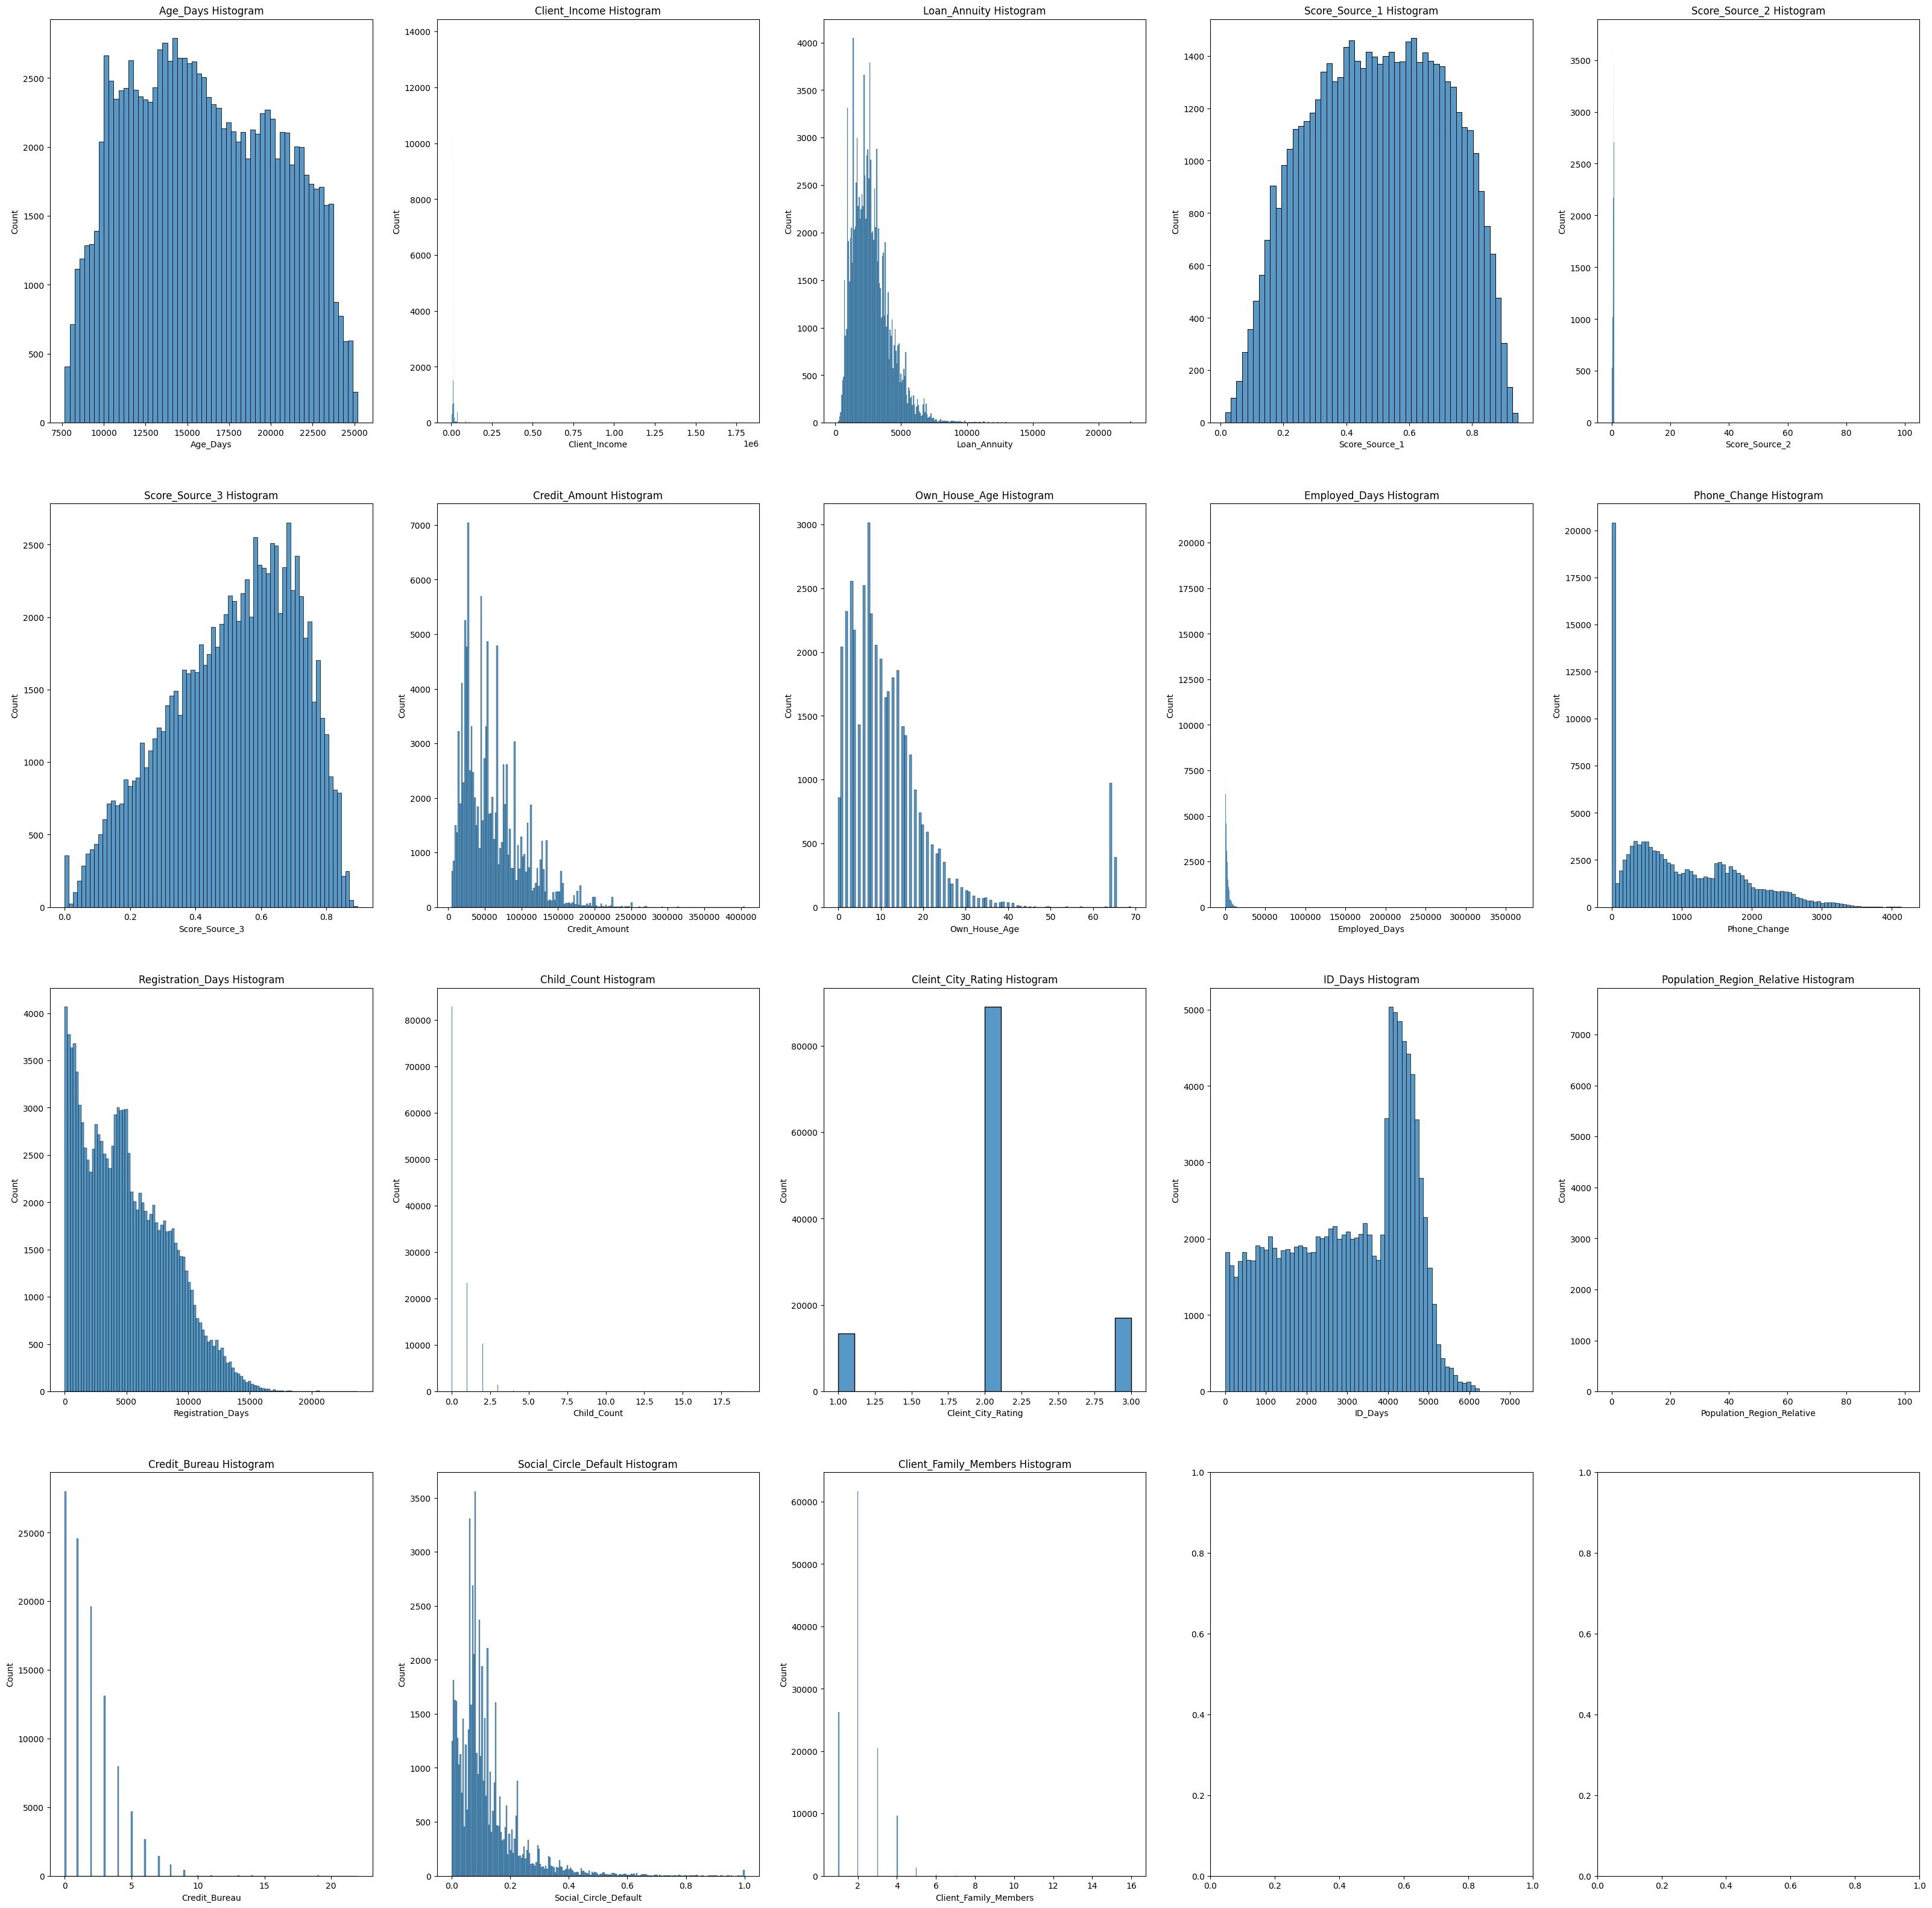

In [9]:
# numeric columns histograms 
# estimated time 3 minutes
fig, axs = plt.subplots(4,5, figsize = (40,40))
i=0
for rows in axs:
    
    for ax in rows:
        if i >17 :
            break
        sns.histplot(x=numeri_cols[i], data=data, ax=ax)
        ax.set_title(numeri_cols[i]+" Histogram")
        i+=1     

### 이상치(Out liner 삭제)

In [10]:
data.Score_Source_2[data.Score_Source_2.ge(0.9)]

44468     100.0
73097     100.0
105522    100.0
109378    100.0
114099    100.0
119243    100.0
Name: Score_Source_2, dtype: float64

In [11]:
data.Population_Region_Relative[data.Population_Region_Relative.ge(0.9)]

33053    100.0
52949    100.0
Name: Population_Region_Relative, dtype: float64

In [12]:
data.Score_Source_2 = data.Score_Source_2.apply(lambda x : 1 if x >=1 else x)
data.Population_Region_Relative = data.Population_Region_Relative.apply(lambda x : 1 if x >=1 else x)

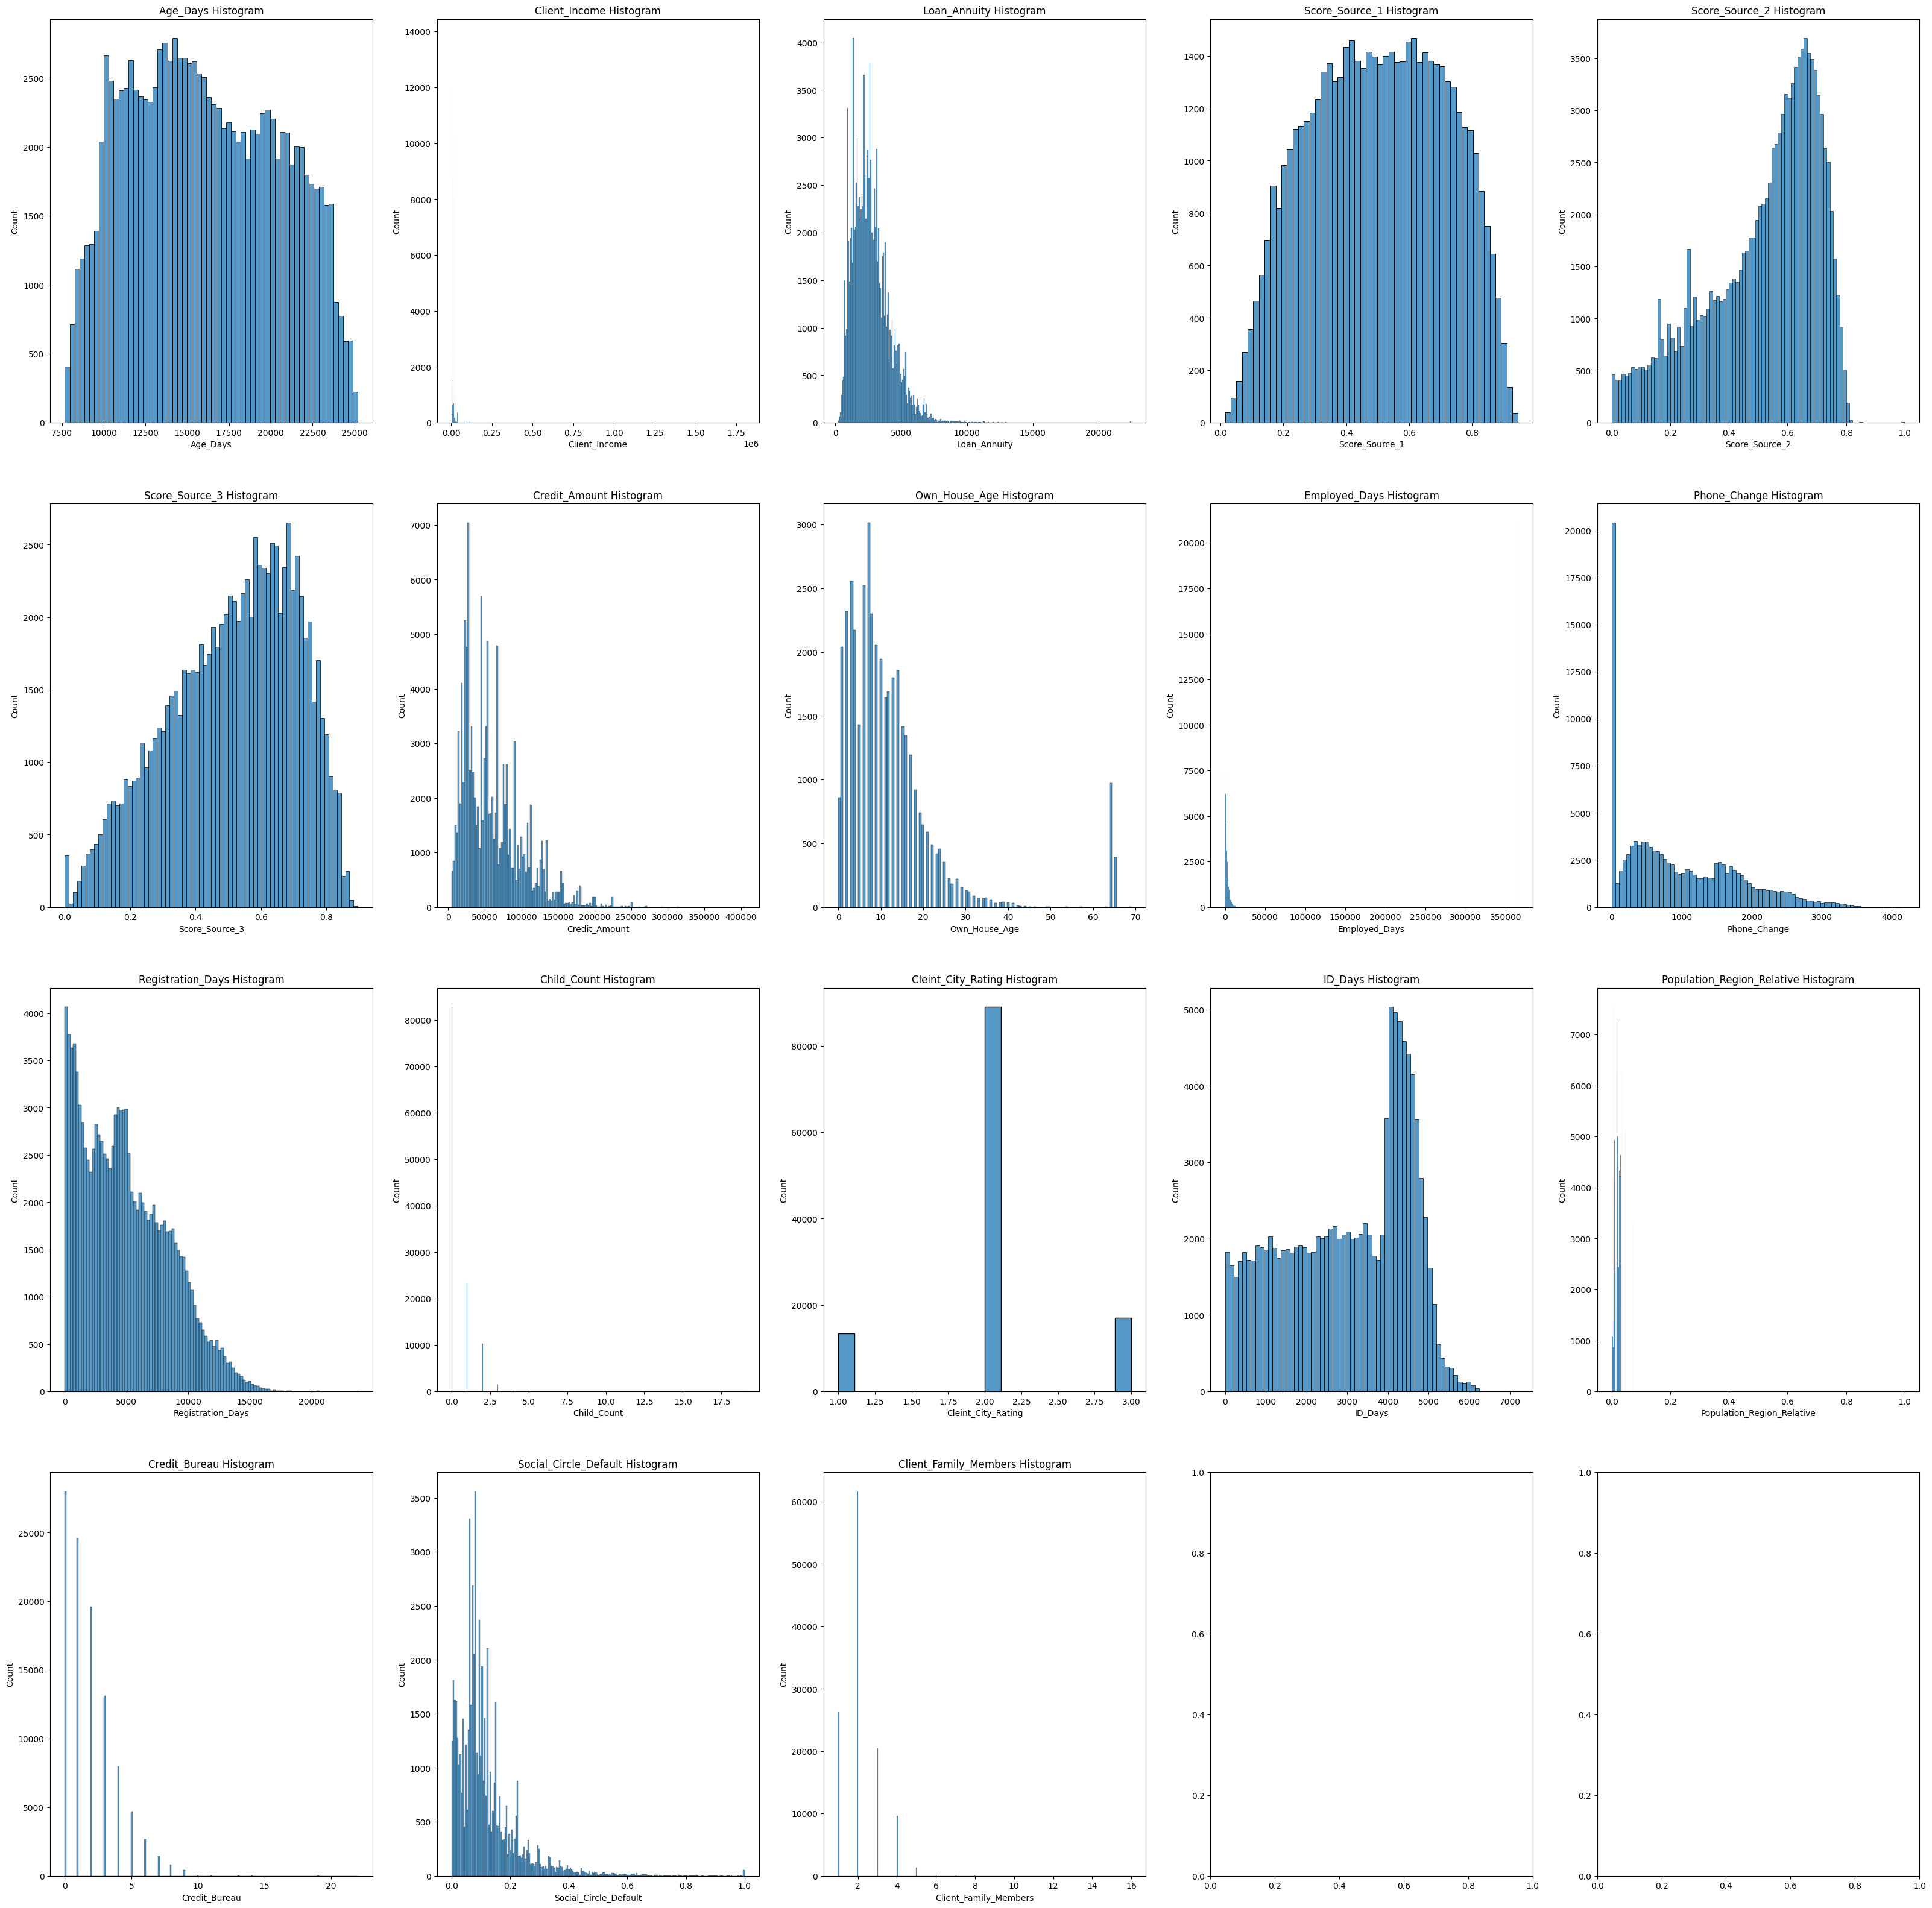

In [14]:
# after remove outliners numeric columns histograms 
# estimated time 20 seconds
fig, axs = plt.subplots(4,5, figsize = (40,40))
i=0
for rows in axs:
    
    for ax in rows:
        if i >17 :
            break
        sns.histplot(x=numeri_cols[i], data=data, ax=ax)
        ax.set_title(numeri_cols[i]+" Histogram")
        i+=1     

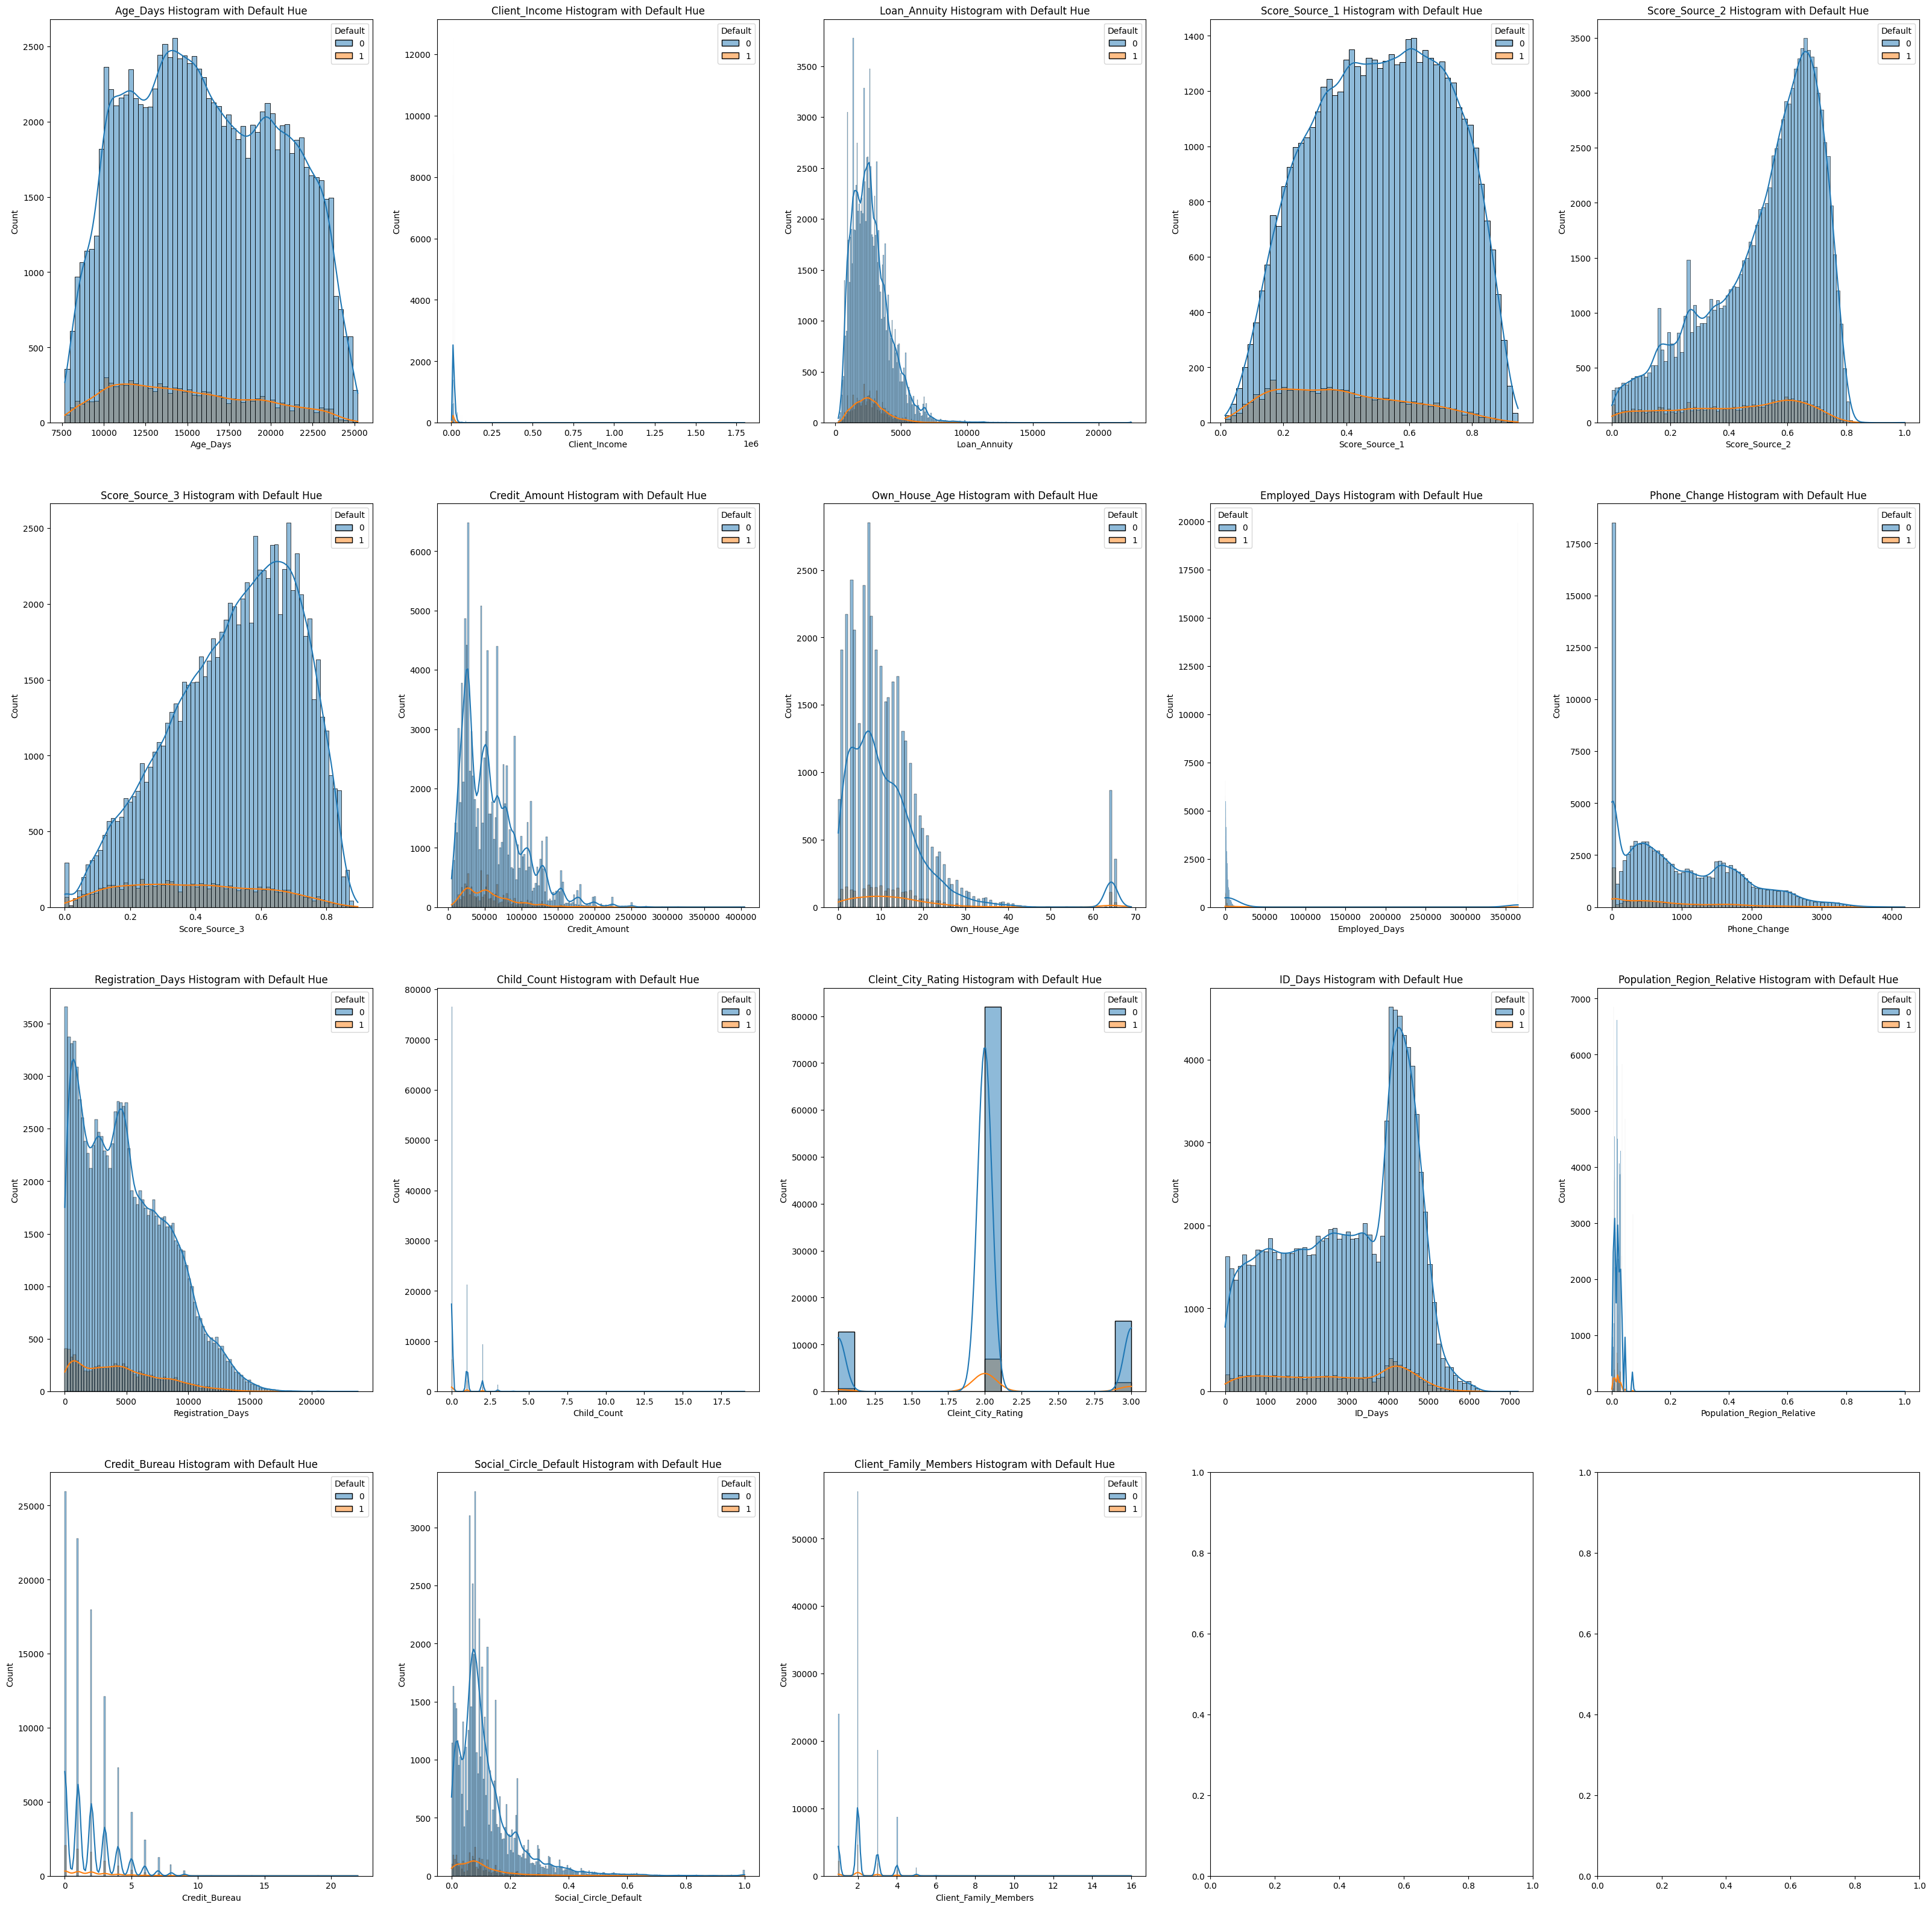

In [56]:
# after remove outliners numeric columns histograms 
# estimated time 50 seconds
fig, axs = plt.subplots(4,5, figsize = (40,40))
i=0
for rows in axs:
    
    for ax in rows:
        if i >17 :
            break
        sns.histplot(hue='Default', kde=True, x=numeri_cols[i], data=data, ax=ax)
        ax.set_title(numeri_cols[i]+" Histogram with Default Hue")
        i+=1     

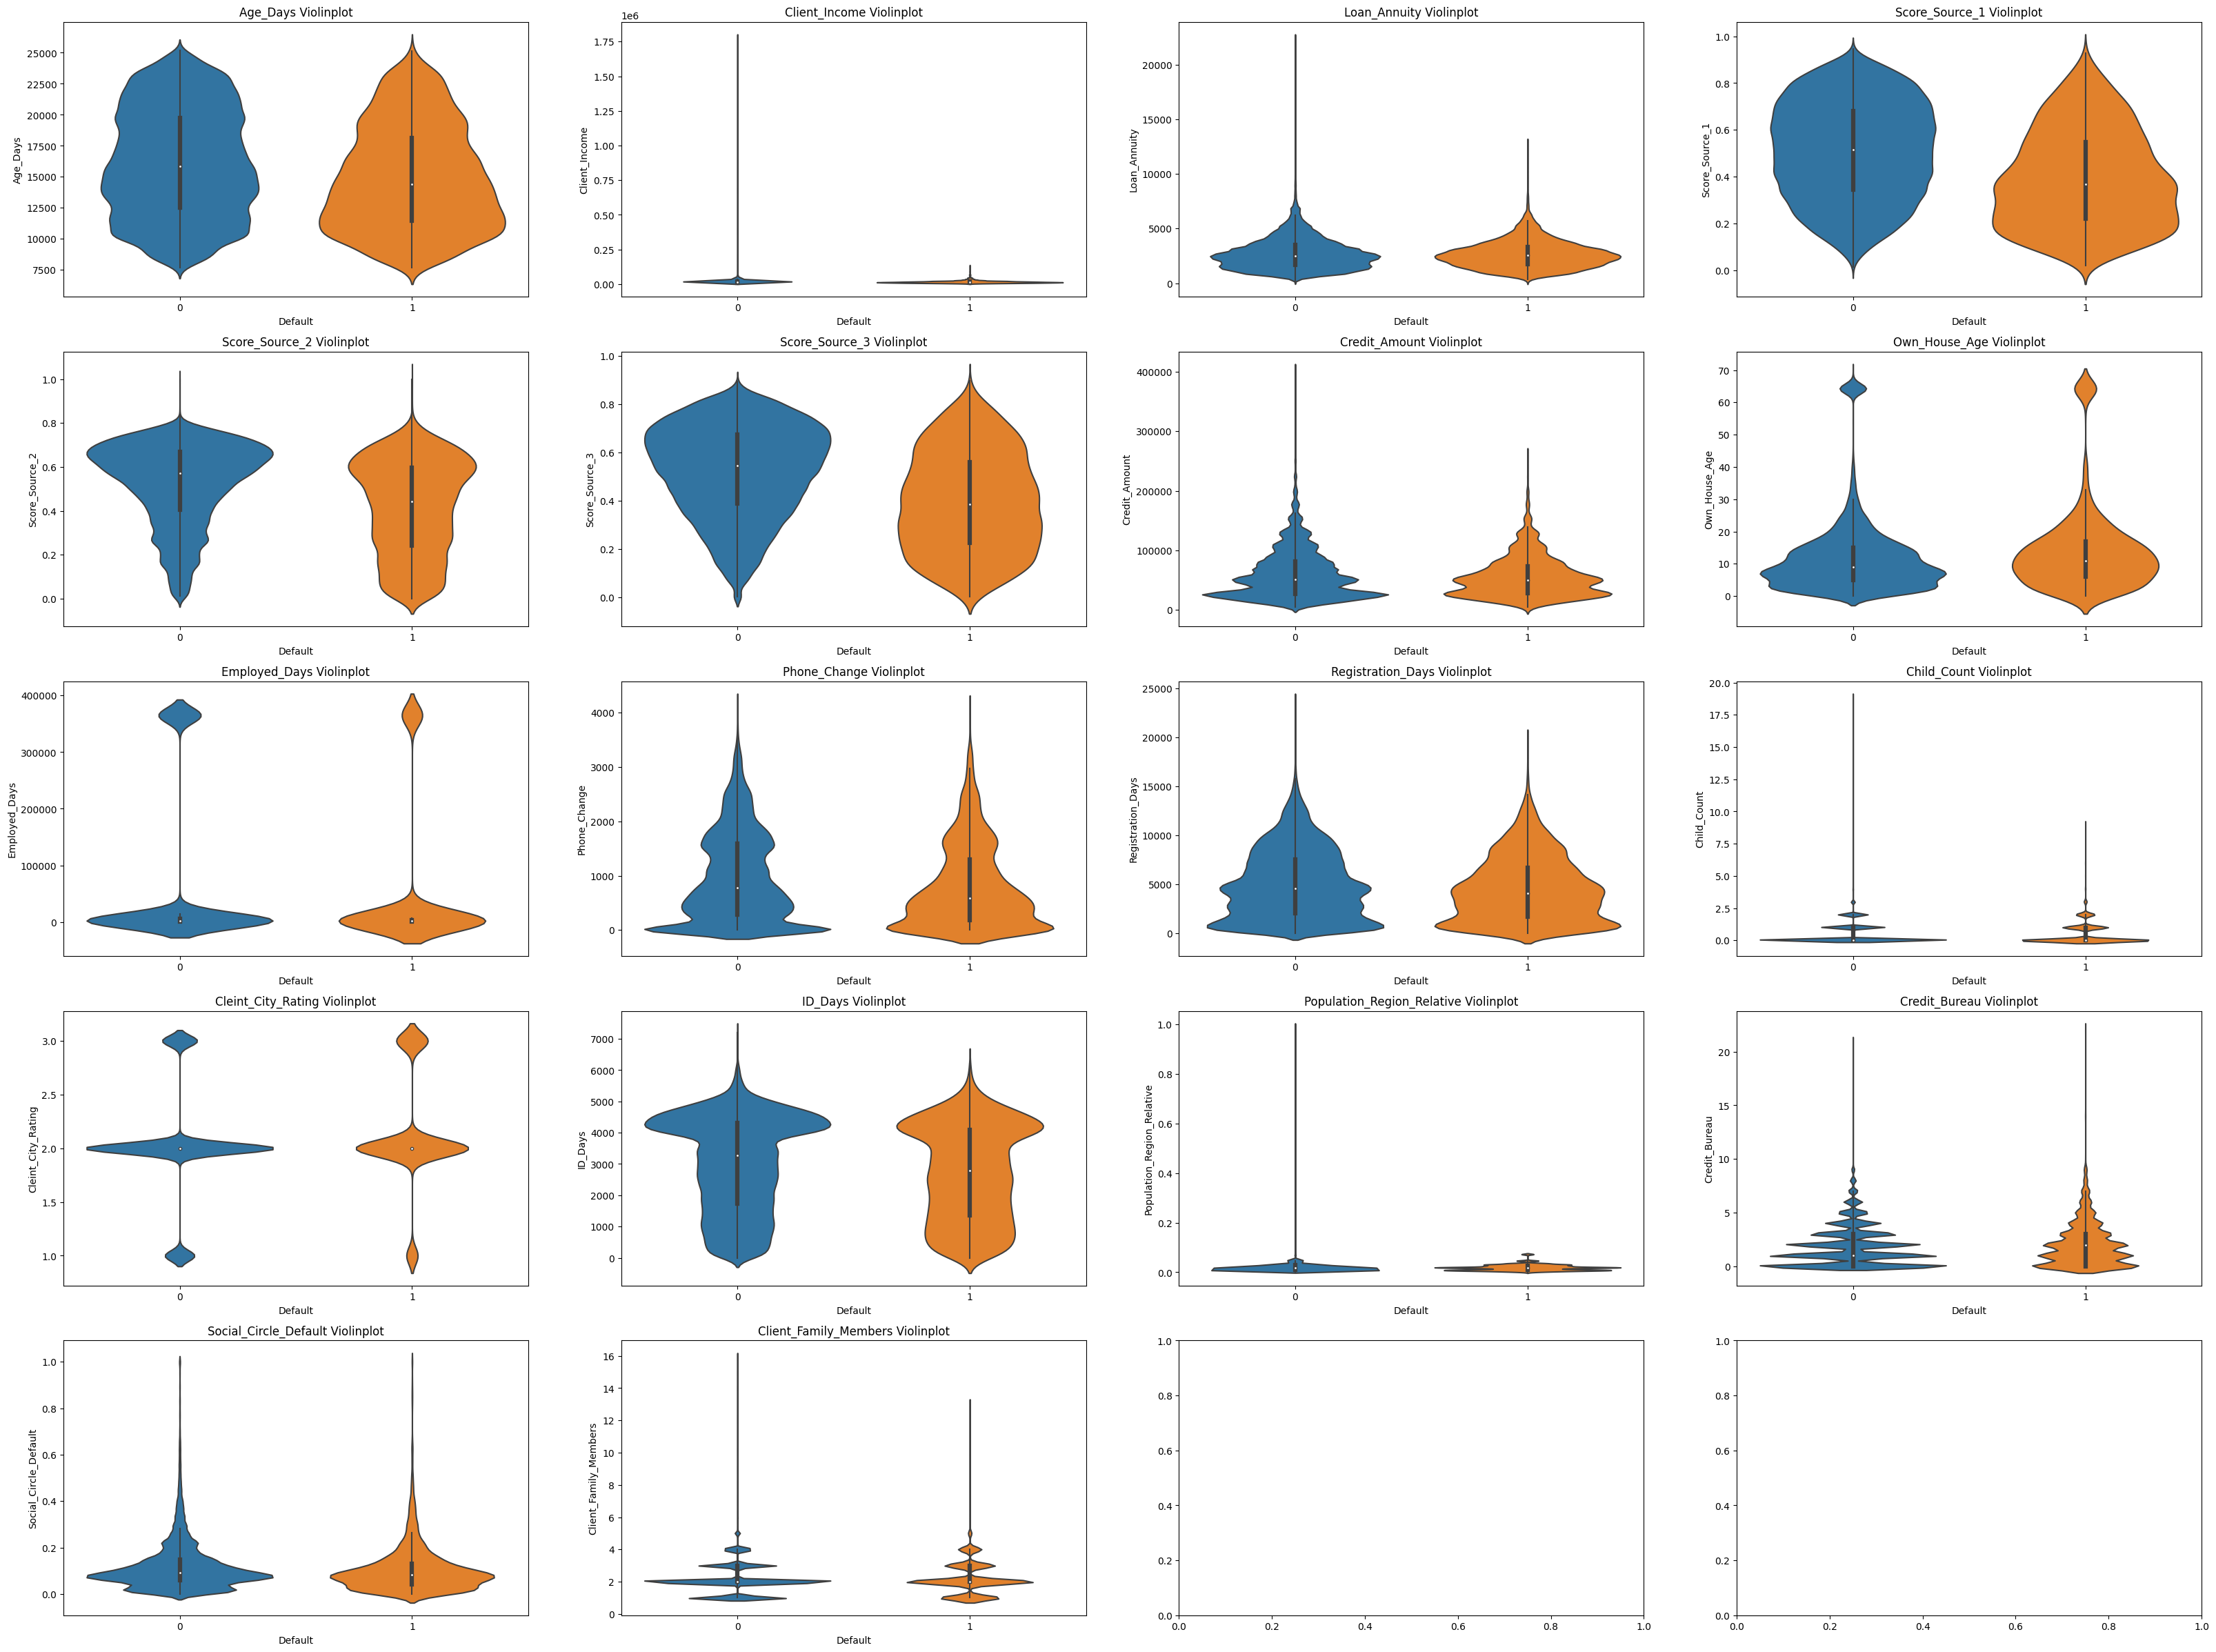

In [16]:
# # exclue outliner and index graph hist 
# # estimated time 3 minutes
fig, axs = plt.subplots(5,4, figsize = (40,30))
i=0
for rows in axs:
    
    for ax in rows:
        if i >17 :
            break
        sns.violinplot(x='Default', y=numeri_cols[i], data=data, ax=ax)
        ax.set_title(numeri_cols[i]+' Violinplot')
        i+=1     

### 세부적 확인

#### Client_Income

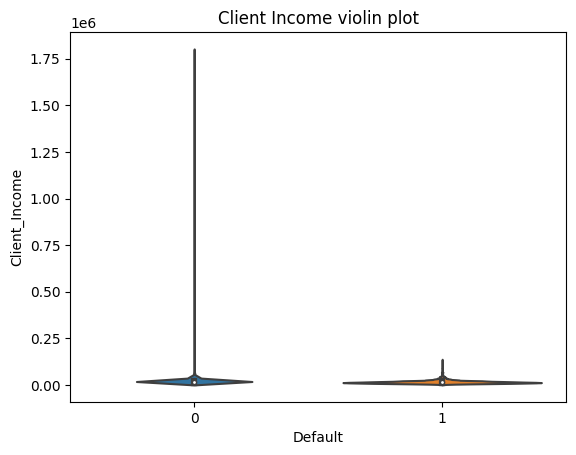

In [50]:
sns.violinplot(x="Default", y="Client_Income" , data=data,  )
plt.title('Client Income violin plot')
plt.show()

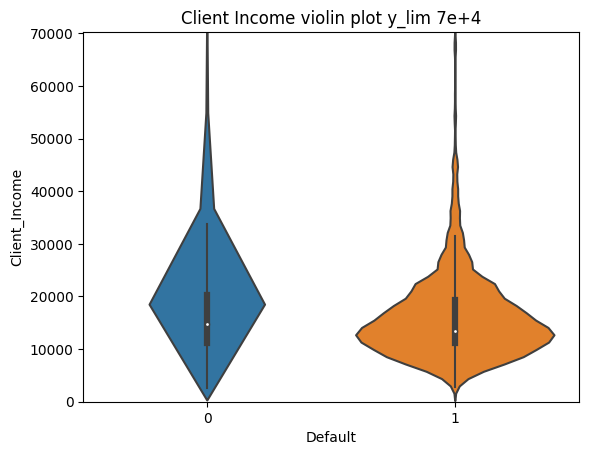

In [51]:
sns.violinplot(x="Default", y="Client_Income" , data=data,  )
plt.title('Client Income violin plot y_lim 7e+4')
plt.ylim([0,7.025000e+04]) # 4사분위 + a까지
plt.show()

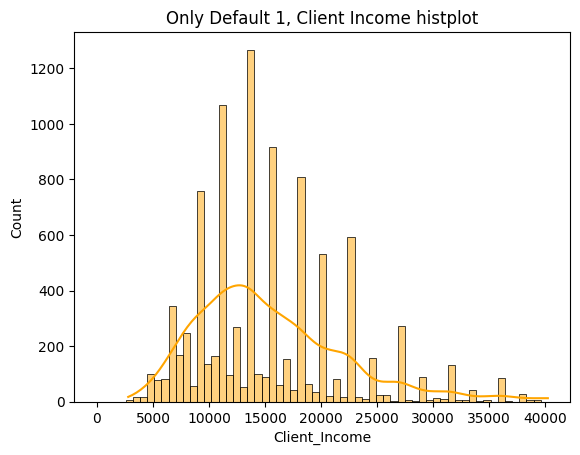

In [53]:
sns.histplot( x="Client_Income" , data=data[data.Default==1], kde=True,  kde_kws={"clip":(0,4.025000e+04)}, binrange=(0, 4.025000e+04), color='orange')
plt.title('Only Default 1, Client Income histplot')
plt.show()

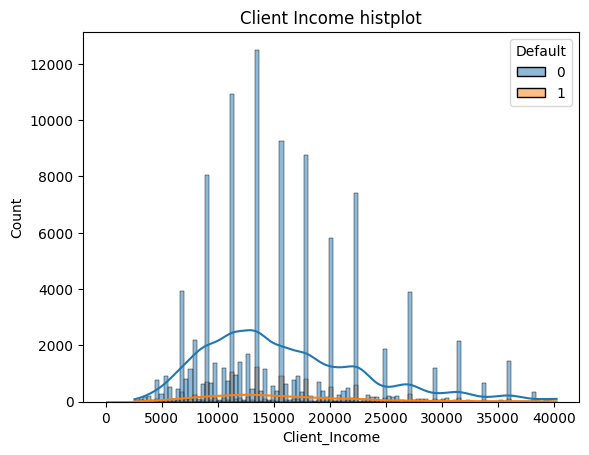

In [54]:
sns.histplot(hue='Default', x="Client_Income" , data=data, kde=True,  kde_kws={"clip":(0,4.025000e+04)}, binrange=(0, 4.025000e+04))
plt.title('Client Income histplot')
plt.show()

#### Employed_Days

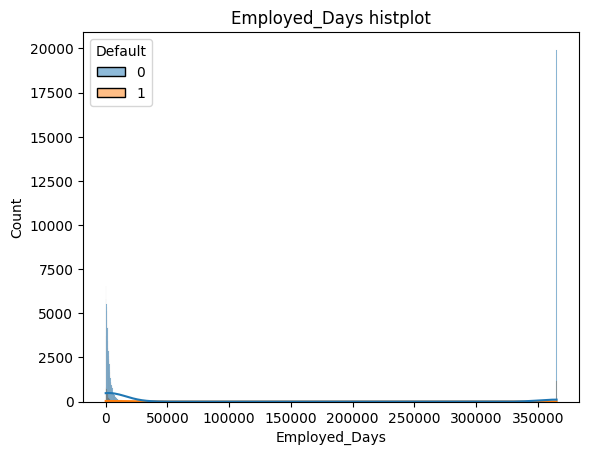

In [63]:
sns.histplot(hue='Default', x="Employed_Days" , data=data, kde=True,  )
plt.title('Employed_Days histplot')
plt.show()

## 

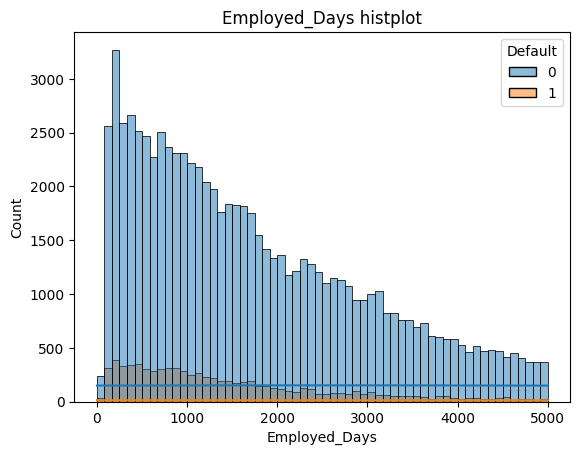

In [60]:
sns.histplot(hue='Default', x="Employed_Days" , data=data, kde=True,  kde_kws={"clip":(0,5e+03)}, binrange=(0, 5e+03))
plt.title('Employed_Days histplot')
plt.show()

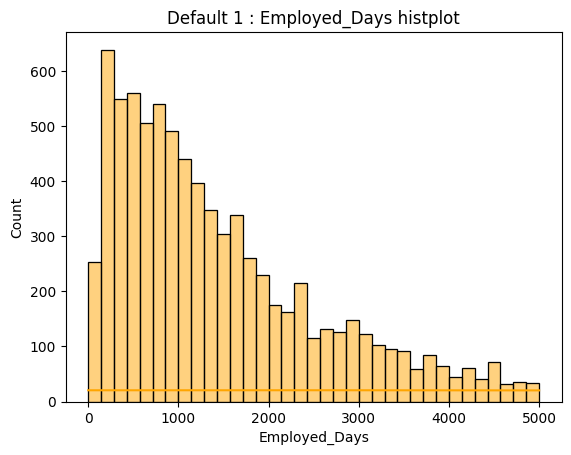

In [68]:
sns.histplot( x="Employed_Days" , data=data[data.Default.eq(1)], kde=True,  color='orange', kde_kws={"clip":(0,5e+03)}, binrange=(0, 5e+03), )
plt.title('Default 1 : Employed_Days histplot')
plt.show()

### Categori Data 

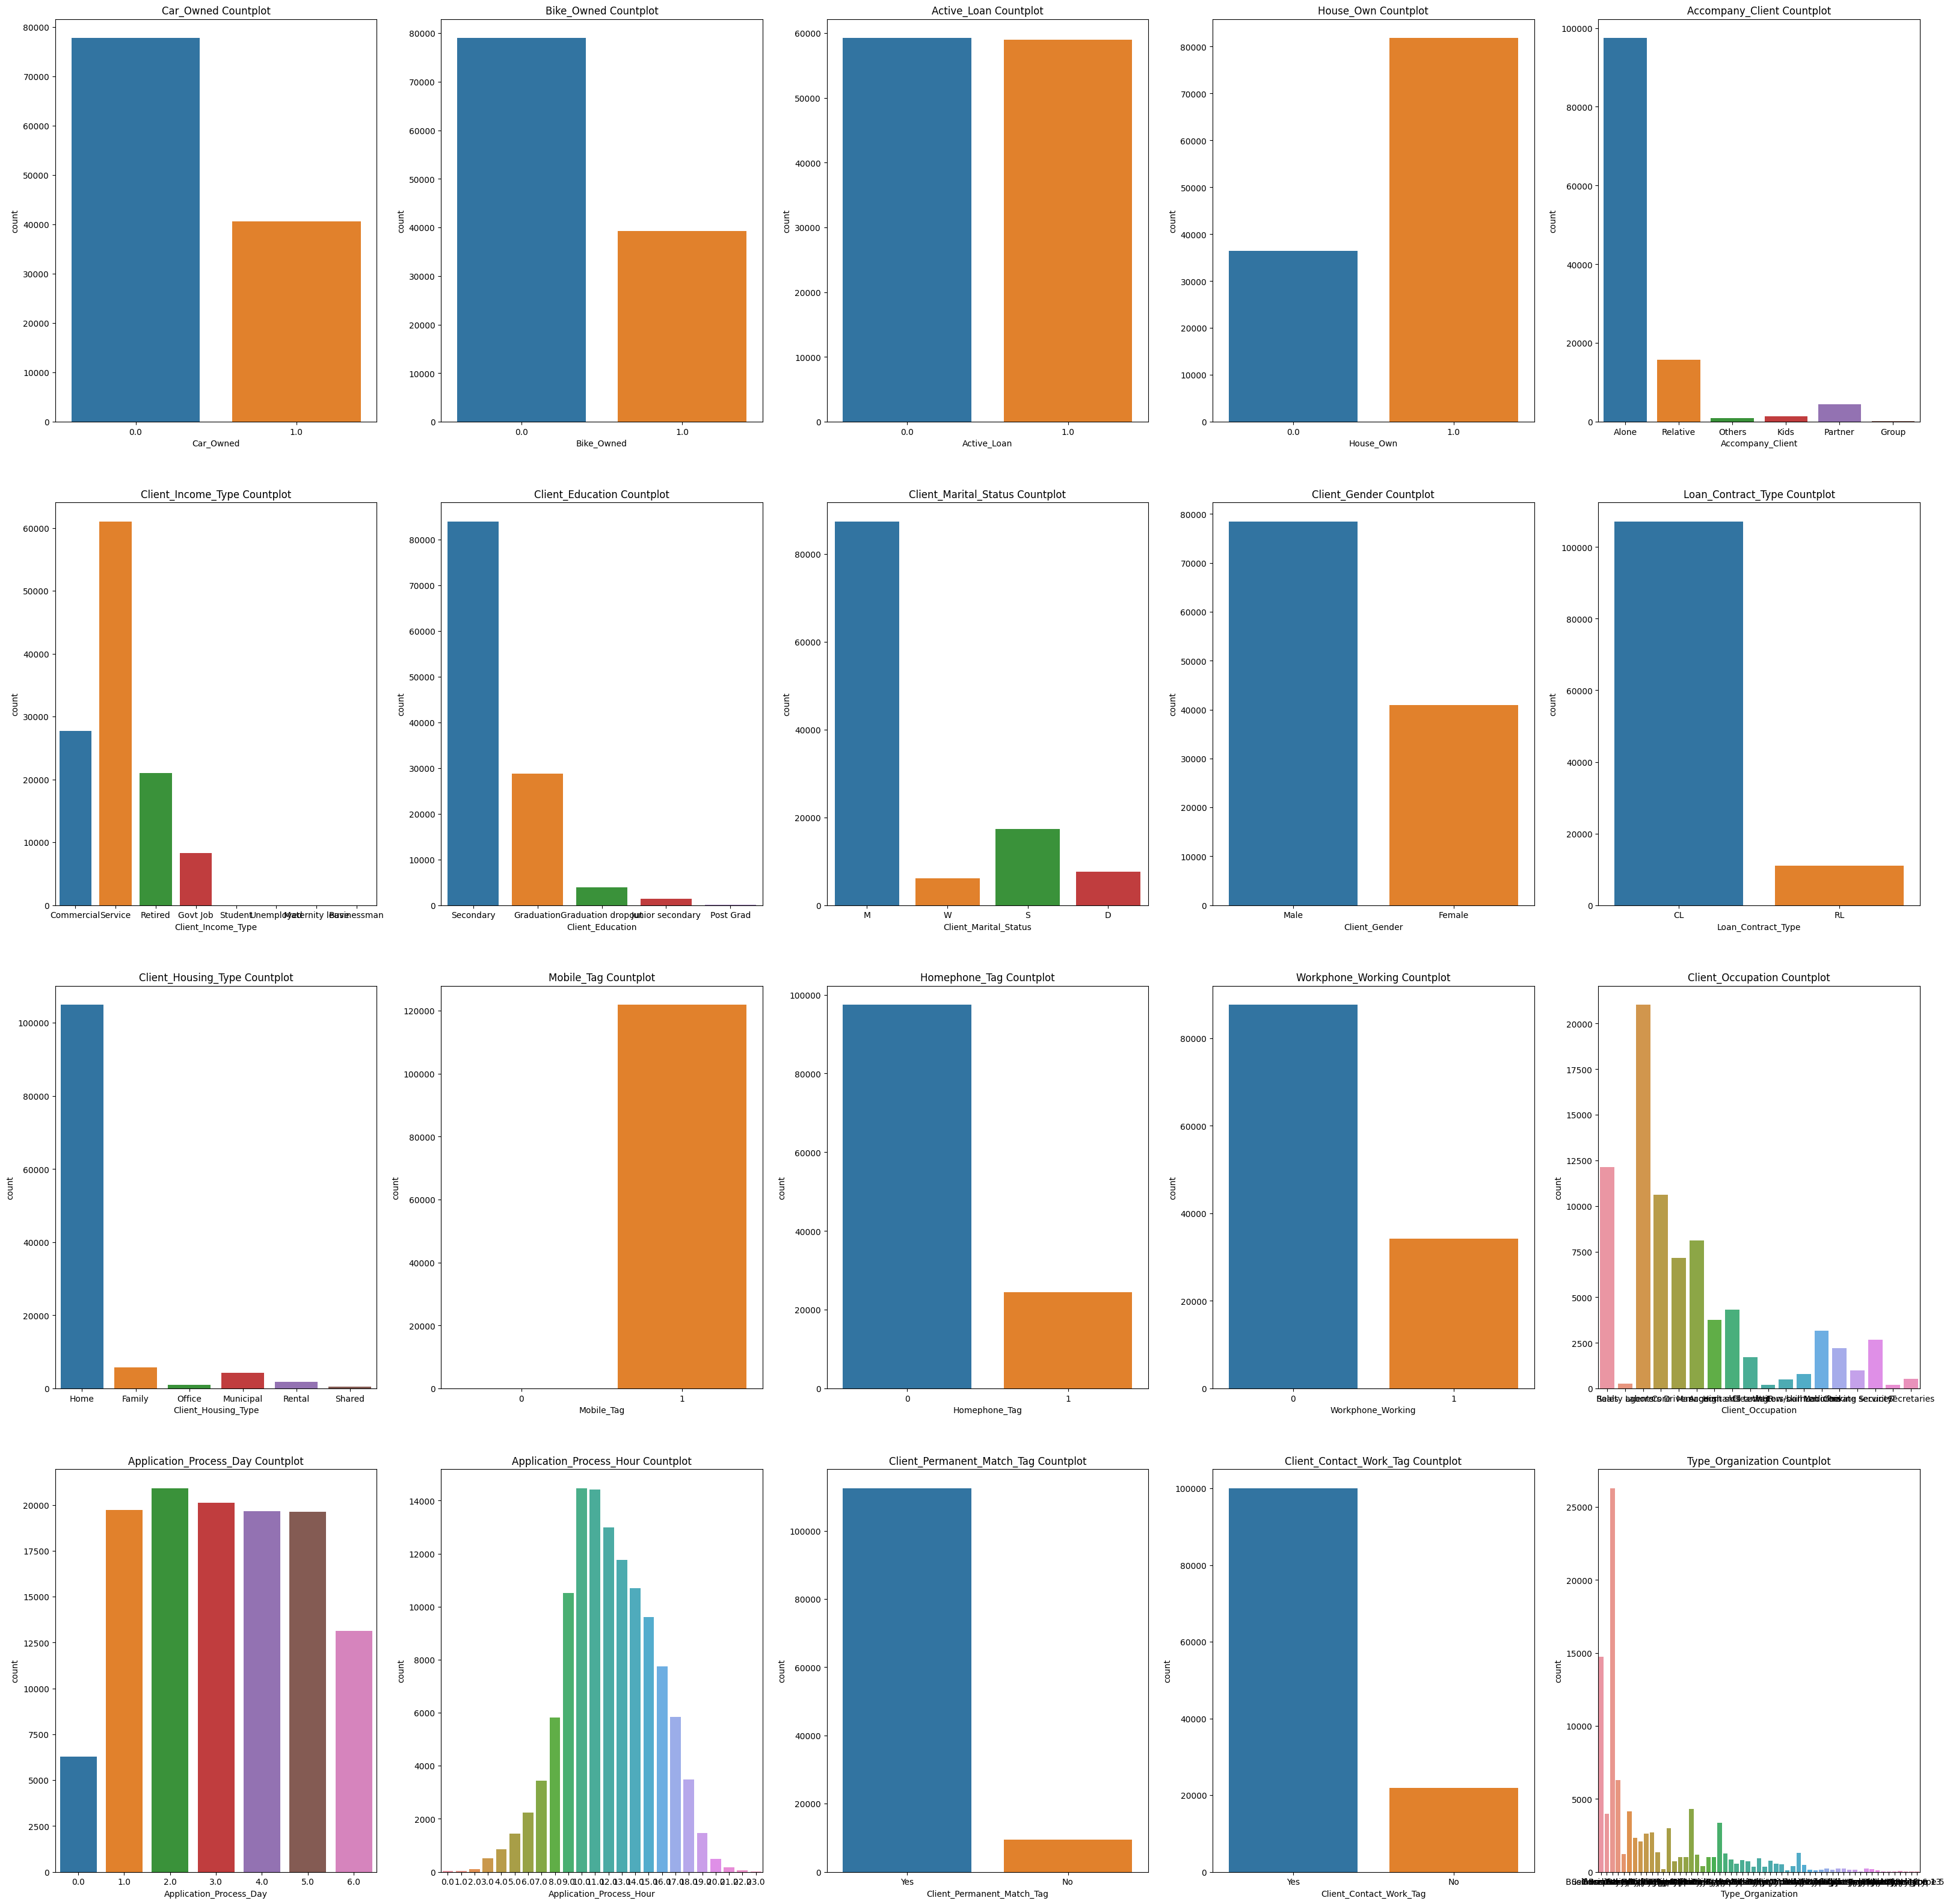

In [73]:
# numeric columns histograms 
# estimated time 3 minutes
fig, axs = plt.subplots(4,5, figsize = (40,40))
i=0
for rows in axs:
    
    for ax in rows:
        if i >19 :
            break
        sns.countplot(x=categori_cols[i], data=data, ax=ax)
        ax.set_title(categori_cols[i]+" Countplot")
        i+=1     

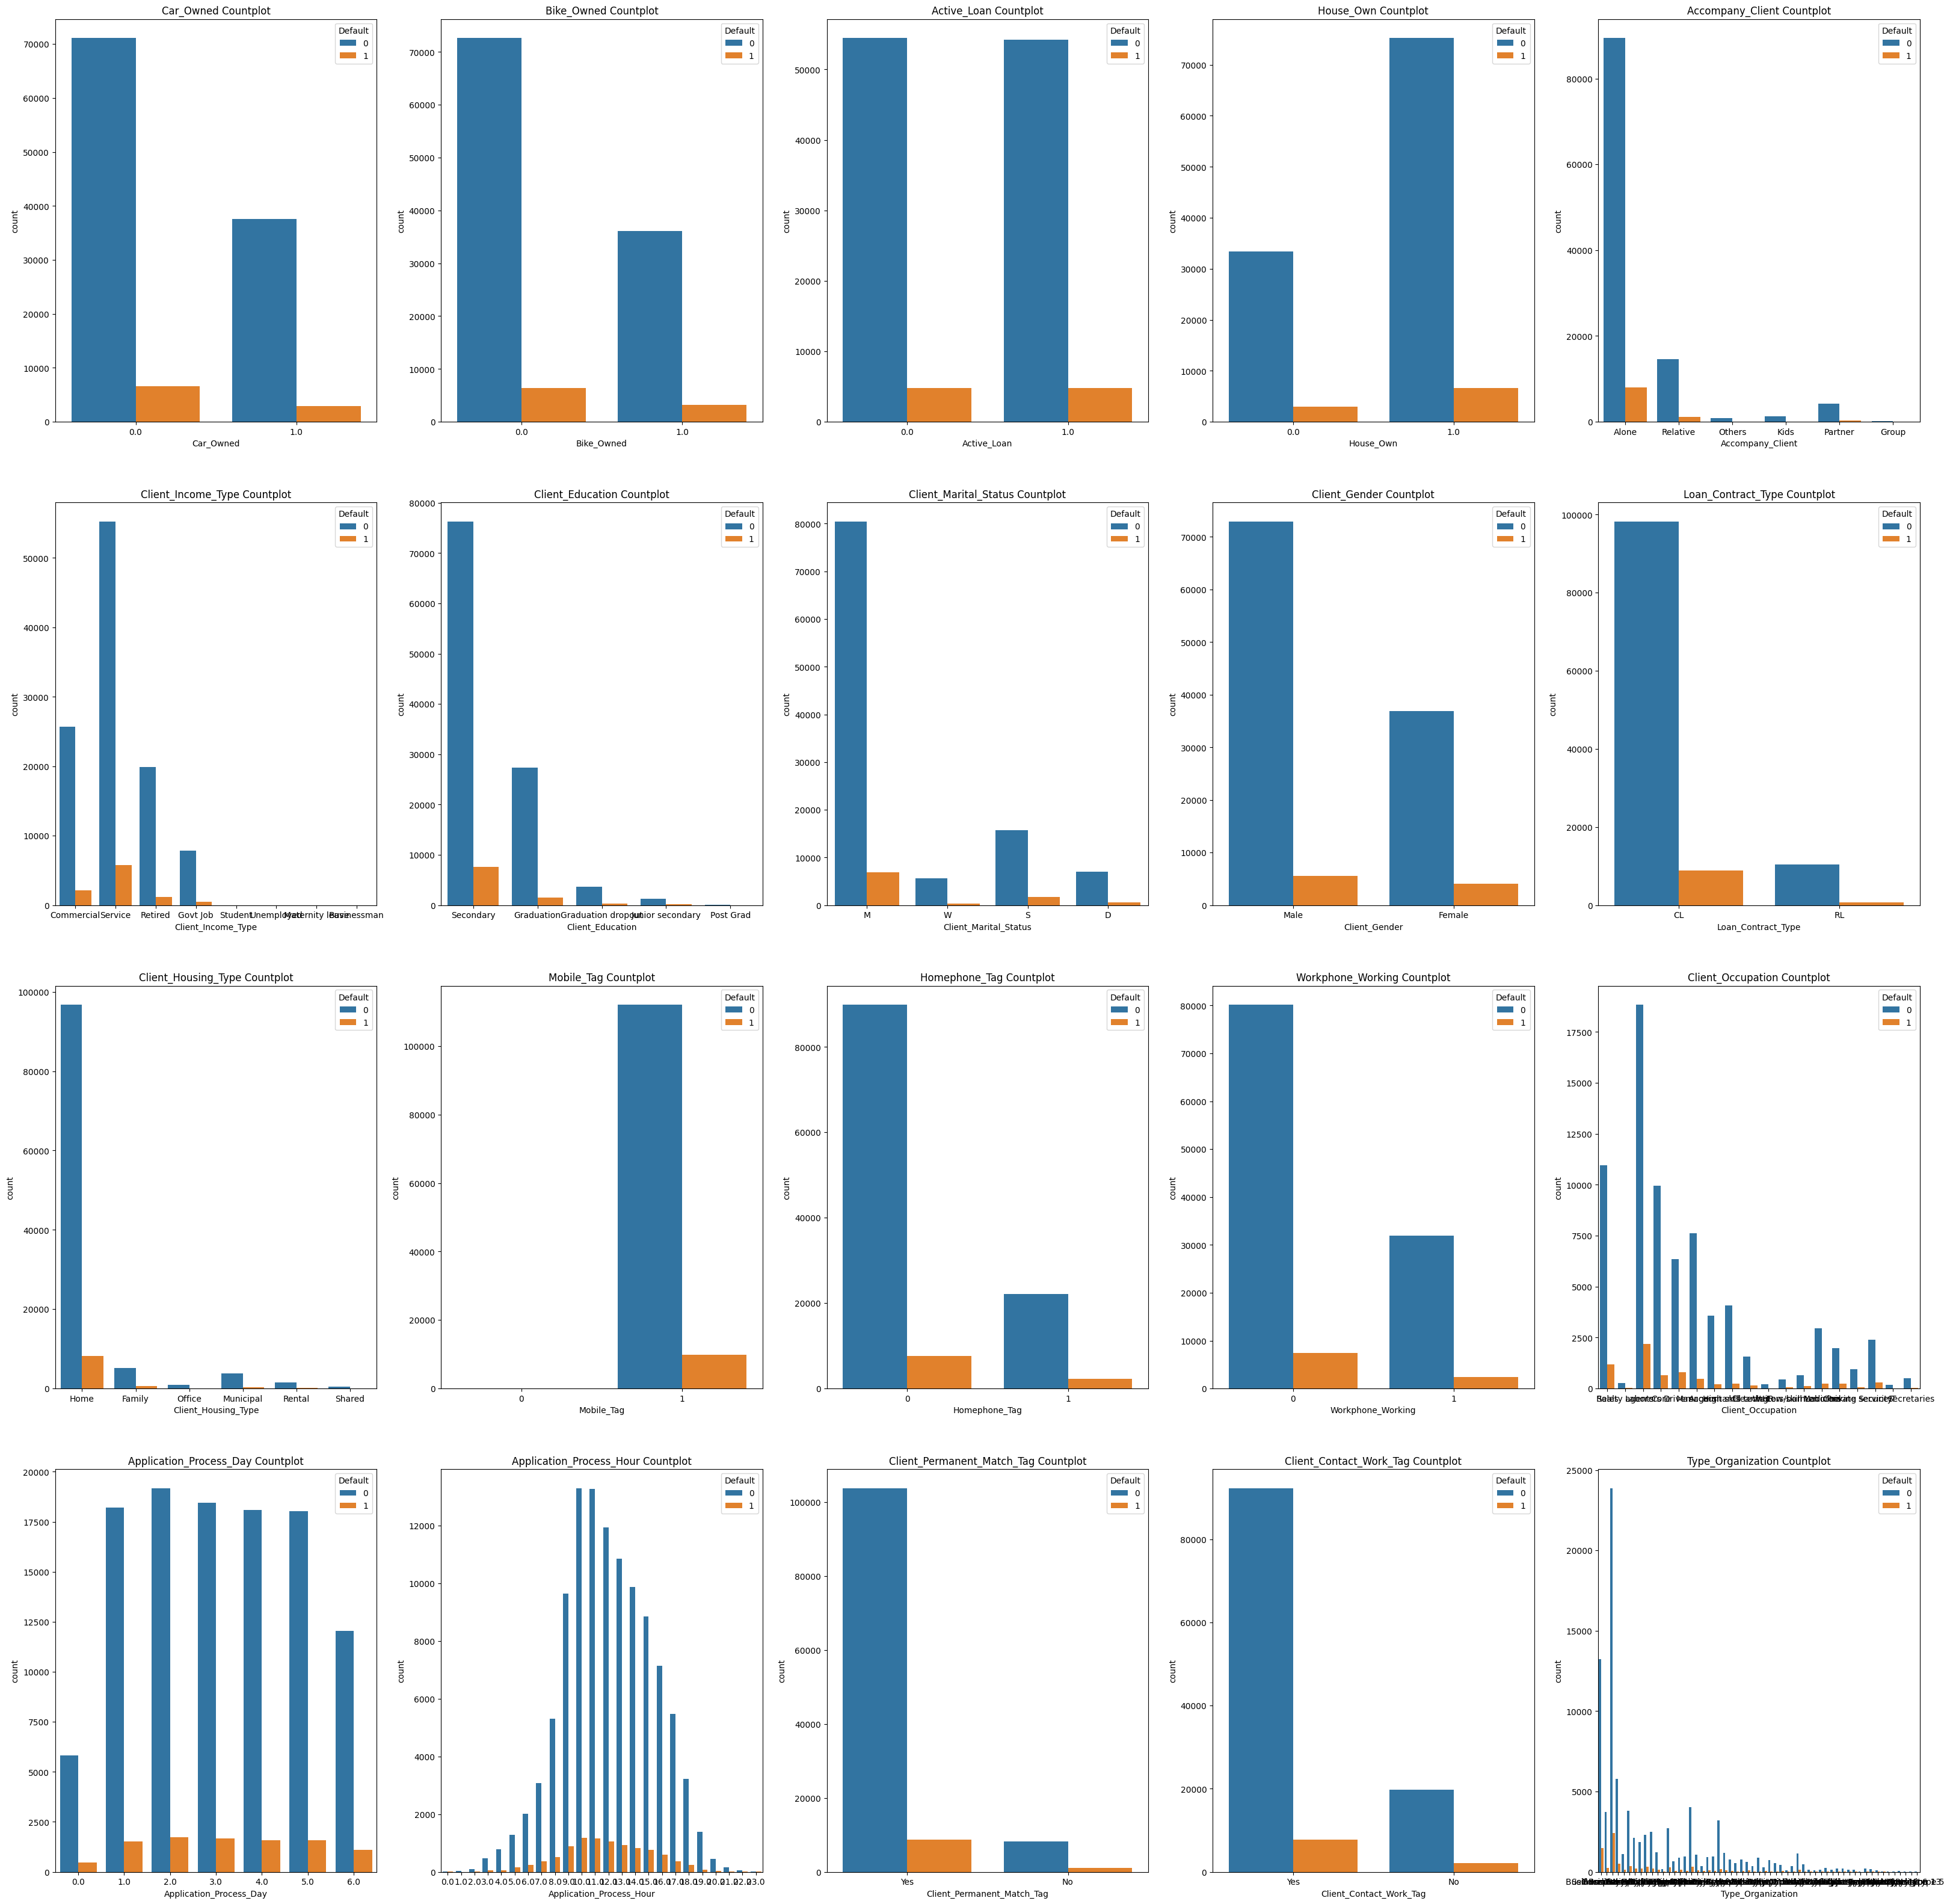

In [76]:
# numeric columns histograms 
# estimated time 3 minutes
fig, axs = plt.subplots(4,5, figsize = (40,40))
i=0
for rows in axs:
    
    for ax in rows:
        if i >19 :
            break
        sns.countplot(hue='Default',x=categori_cols[i], data=data, ax=ax)
        ax.set_title(categori_cols[i]+" Countplot")
        i+=1     

Mobile Tag는 다 1이므로 필요없음

단일 속성으로 구분하기 어려움 

## Null Value 확인

In [77]:
# 널값 퍼센트 데이터 생성
data_null_perecnet = (data.isnull().sum()/ len(data)) *100
data_null_perecnet_default_1 = (data[data.Default==1].isnull().sum()/ len(data[data.Default==1].isnull())) * 100

#널 데이터프레임
nulls_df = pd.DataFrame(data=[data_null_perecnet,data_null_perecnet_default_1], index=['All_Data','Default_1'])
nulls_df = nulls_df.drop('Default', axis=1)
nulls_df =nulls_df.T.reset_index().rename(columns={'index':'columns_name'})

# 임시로만든 log 삭제
# nulls_df = nulls_df.T.drop(38,axis=1).T
# 내림차순으로 정렬
nulls_df = nulls_df.sort_values('All_Data', ascending=False)
# x 간격생성
bar_width = 3
x =np.arange(0,304,8)
x2 =np.arange(0,228,6)


In [78]:
len(nulls_df.columns_name.tolist())

38

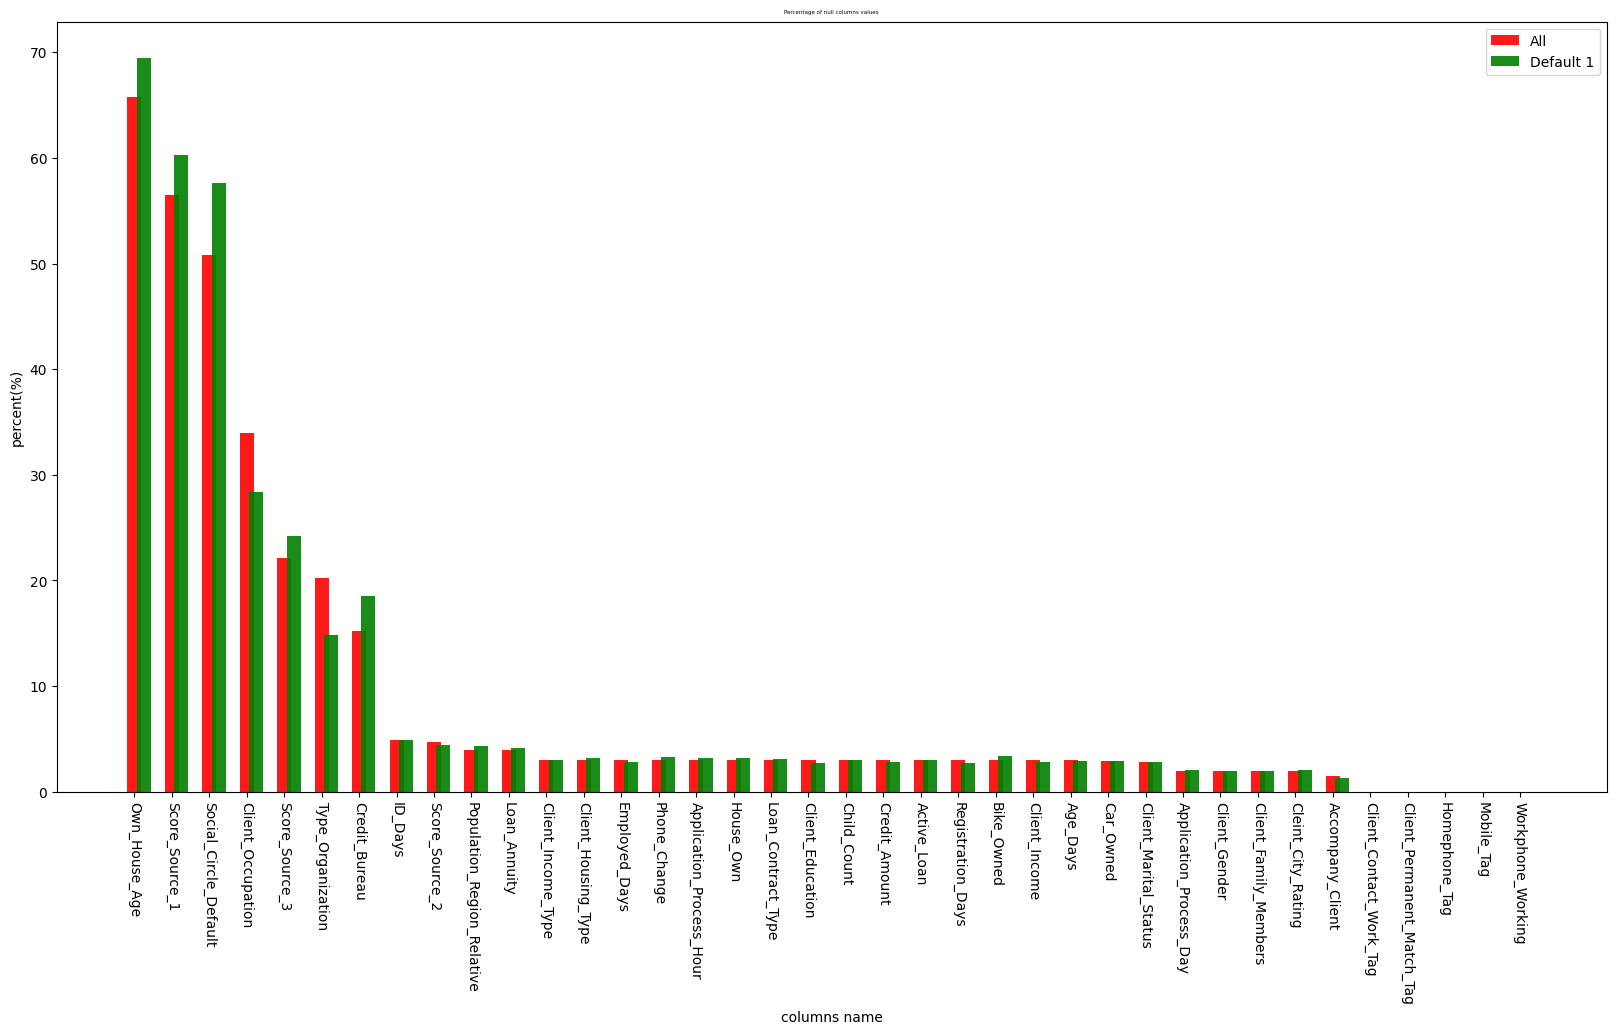

In [79]:
#그래프 생성
plt.figure(figsize=(20,10))
plt.bar(x=x, height='All_Data' ,data=nulls_df, color='r' ,width=bar_width, label='All', alpha=0.9) 
plt.bar(x=x+2, height='Default_1' ,data=nulls_df,color='g' ,width=bar_width ,label='Default 1', alpha=0.9)
plt.xticks(x,nulls_df.columns_name.tolist(), rotation=270, )
plt.legend()
plt.title('Percentage of null columns values ', size=4)
plt.ylabel('percent(%)')
plt.xlabel('columns name')
plt.show()

'Own_House_Age', 'Score_Source_1', 'Social_Circle_Default', 'Client_Occupation', 'Score_Source_3', 'Type_Organization', 'Credit_Bureau', 널값이 10% 넘어가서 채우기 힘듬

EDA 분석결과 단일 속성으로 불체납할지, 체납할지 알기가 어려워서